# 時系列の扱い

In [1]:
import pygmt
import datetime

震源分布に用いたデータから，地震発生日とマグにチュードからなる M-T 図を作成してみましょう．まずは`datetime`モジュールを用いて，震源カタログの年・月・日のデータをまとめて日付オブジェクトのリストにします．

In [2]:
# 昔のバージョンは pygmt.datasets.load_japan_quakes() でした
hypdata = pygmt.datasets.load_sample_data(name='japan_quakes')
hyptim = [datetime.datetime(yr, mo, dy) for yr, mo, dy in zip(hypdata.year, hypdata.month, hypdata.day)]
hypmag = hypdata.magnitude

ここではリスト`hyptim`を生成するのにPythonの内包表記を活用しています．この表現は，愚直に書くと

```python
hyptim = []
for yr, mo, dy in zip(hypdata.year, hypdata.month, hypdata.day):
    hyptim.append(datetime.datetime(yr, mo, dy))
```
と等価です．

また，`for`文に現れる `zip` 関数は複数のリスト（など）の要素をまとめる関数で，ループで変数 `yr`, `mo`, `dy` にそれぞれ `hypdata.year`，`hypdata.month`, `hypdata.day` から一つずつの要素を代入してくれます．．

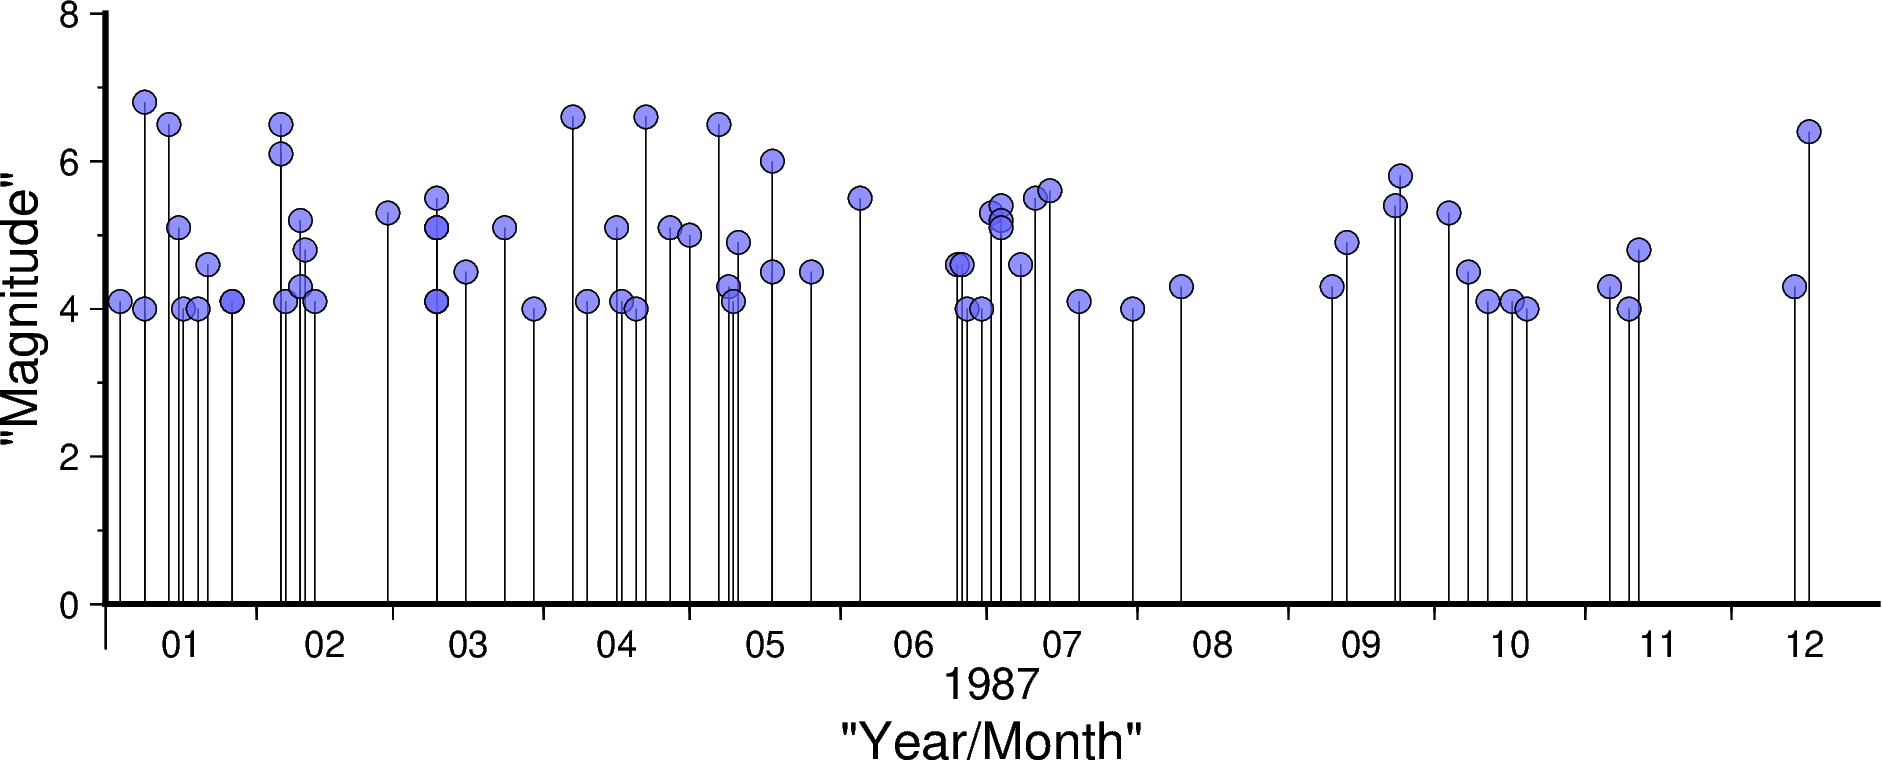

In [3]:
fig = pygmt.Figure()

fig.basemap(
    projection = 'X15c/5c', 
    region     = ['1987-01-01', '1987-12-31', 0, 8], 
    frame      = ['WS', 'pxa1o', 'sxa1Y+l"Year/Month"', 'yaf+l"Magnitude"']
)

for dy, mag in zip(hyptim, hypmag):
    
    fig.plot(
        x    = [dy, dy],
        y    = [0, mag],
        pen  = 'default,black'
    )
    

fig.plot(
    x     = hyptim, 
    y     = hypmag, 
    style = 'c0.2c', 
    fill  = '100/100/255@30', 
    pen   = 'default,black'
)

fig.show()

まず `fig.basemap` で枠を描画しています．領域の横軸は `YYYY-MM-DD` の日付ISOフォーマットで指定しています．`frame` については，横軸は軸のすぐそば（primary）に月名（`o`）を，少し離れて（secondary）年（`Y`）を描画しています．このように二種類の軸情報を描画するには，`px` (primary) と `sx` (secondary) をそれぞれ指定すればよいです．

次のforループでは，準備してあった `datetime` 型の日付とマグニチュードから`zip`関数を用いてそれぞれ一つづつ抜き出し，縦棒を描画しています．シェルスクリプトの場合は，区切り行（デフォルトは `>` が1文字目にある行）を用いて

```text
> 
1987-01-01 0
1987-01-01 5
>
1987-02-05 0
1987-02-05 4.5
>
...
```
のようなマルチセグメントデータを作って一斉にプロットできます．
しかし，PyGMTにおいて変数受け渡しでマルチセグメントデータを`fig.plot`に渡す方法が今のところ不明です．
そこで，`for` 分で地震の個数回 `plot` 命令を発行するという力技で解決しています．効率の良い方法とはいえず，一旦ファイルに落としてから読み込むほうが素直かもしれません．